In [5]:
pip install opencv-python

     --------------------------------------- 35.6/35.6 MB 50.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from matplotlib import units
from tensorflow.keras.optimizers import Adam
import random

In [9]:

opt=Adam(learning_rate=0.001)
ds = tf.keras.datasets.mnist
(dxtrain,dytrain),(dxtest,dytest)=ds.load_data()
dxtrain=tf.keras.utils.normalize(dxtrain,axis=1)
dxtest=tf.keras.utils.normalize(dxtest,axis=1)

11490434/11490434 [==============================] - 0s 0us/step


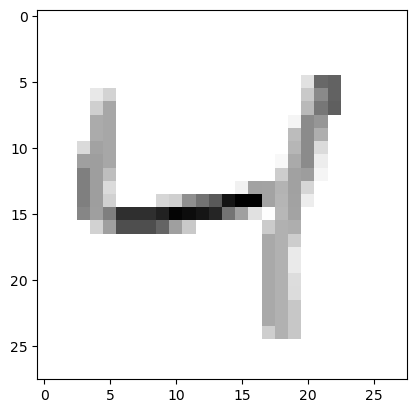

In [10]:
plt.imshow(dxtrain[2],cmap=plt.cm.binary)
plt.show()

In [4]:

model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(units=128,activation="relu"))
model.add(tf.keras.layers.Dense(units=128,activation="relu"))
model.add(tf.keras.layers.Dense(units=10,activation="softmax"))

model.compile(optimizer="Adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

model.fit(dxtrain,dytrain,epochs=3)

model.save("mnist1.model")

Epoch 1/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2619 - accuracy: 0.9226
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1091 - accuracy: 0.9660
Epoch 3/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0744 - accuracy: 0.9765
INFO:tensorflow:Assets written to: mnist1.model\assets


In [5]:
import pickle
pickle.dump(model,open("./handwritenumber-classifier.pkl","wb"))

INFO:tensorflow:Assets written to: ram://7ccb57da-25fd-4395-a468-a4cd455014a3/assets


1/1 [==============================] - 0s 43ms/step
May be  4


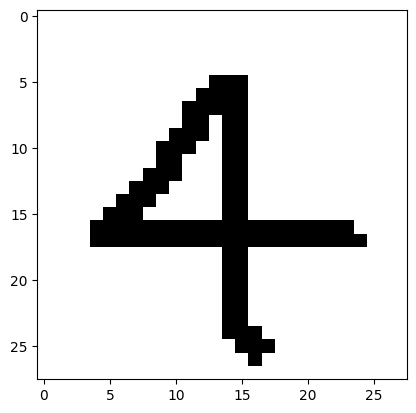

In [87]:

pic=cv.imread("picture.png")[:,:,0]
pic=np.invert(np.array([pic]))
pic1=tf.keras.utils.normalize(pic,axis=1)
resultt=model.predict(pic1)
print("May be ",np.argmax(resultt))
plt.imshow(pic[0],cmap=plt.cm.binary)
plt.show()